In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import files

# This will prompt you to select a file from your local system
uploaded = files.upload()

Saving Covid Dataset.csv to Covid Dataset.csv


In [ ]:
covid_data = pd.read_csv("Covid Dataset.csv")

In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
yes_count = covid_data['COVID-19'].value_counts().get('Yes', 0)
print("Number of rows with 'Yes':", yes_count)

Number of rows with 'Yes': 4383


In [ ]:
no_count = covid_data['COVID-19'].value_counts().get('No', 0)
print("Number of rows with 'no':", no_count)

Number of rows with 'no': 1051


In [ ]:
covid_data.shape

(5434, 21)

In [ ]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
# create a table with data missing
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<Axes: >

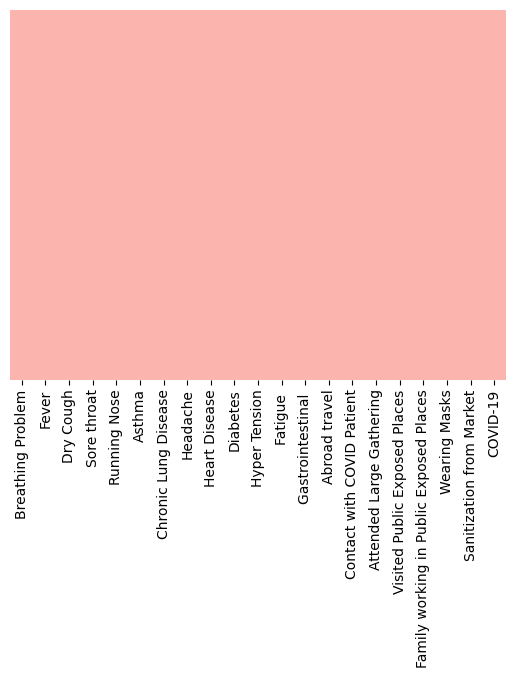

In [ ]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

<ipython-input-12-10afb37cd96c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")


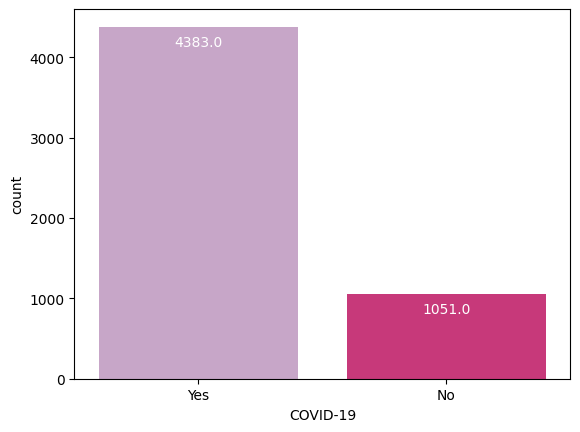

In [ ]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

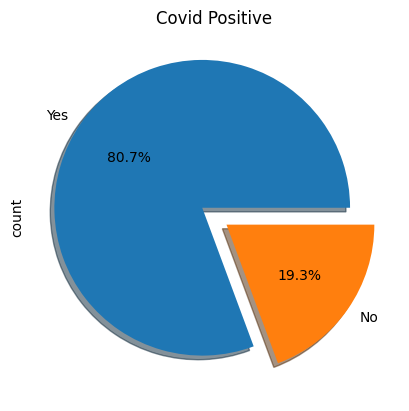

In [ ]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', ha='center', va='top', color='white', size=10)
plt.show()

<ipython-input-22-10854806ba23>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")


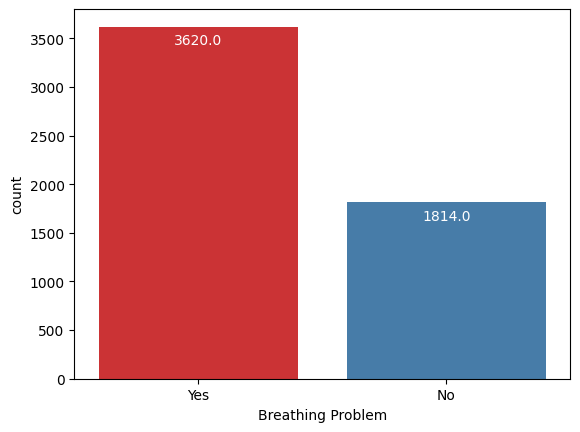

In [ ]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

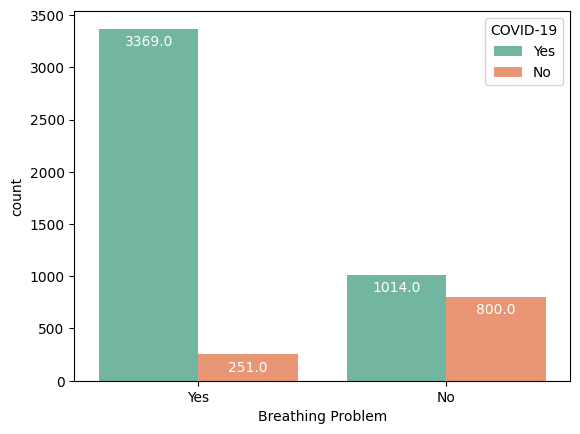

In [ ]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

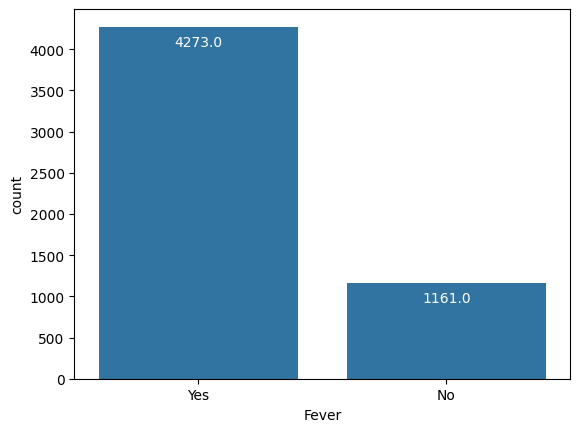

In [ ]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

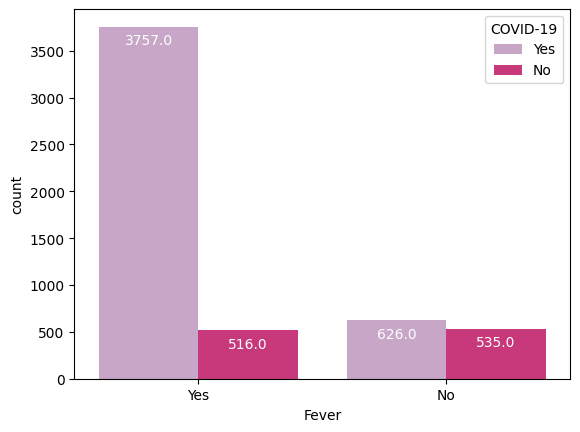

In [ ]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

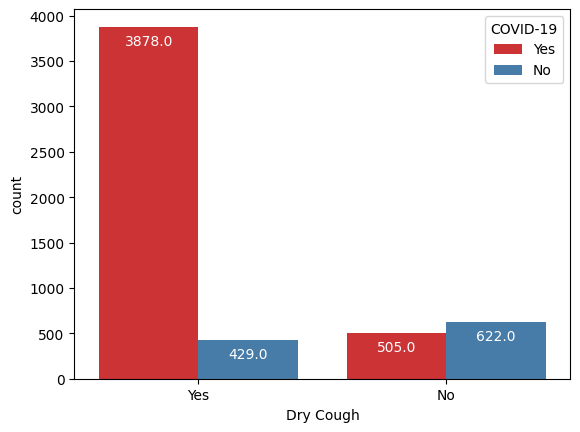

In [ ]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

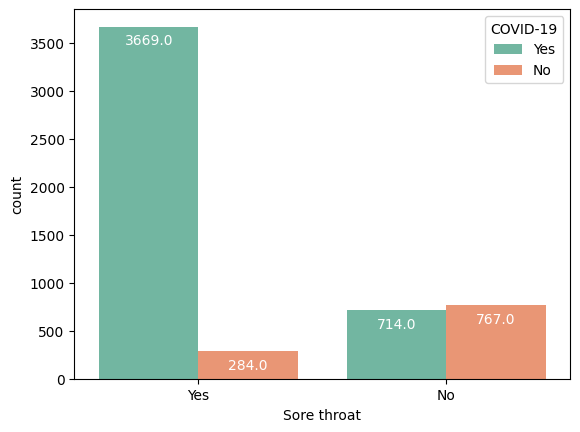

In [ ]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

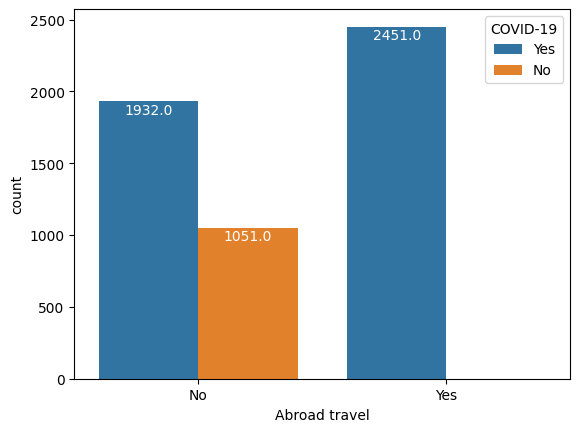

In [ ]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

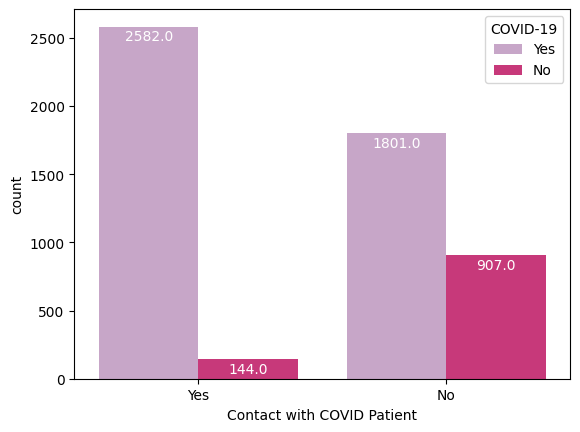

In [ ]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

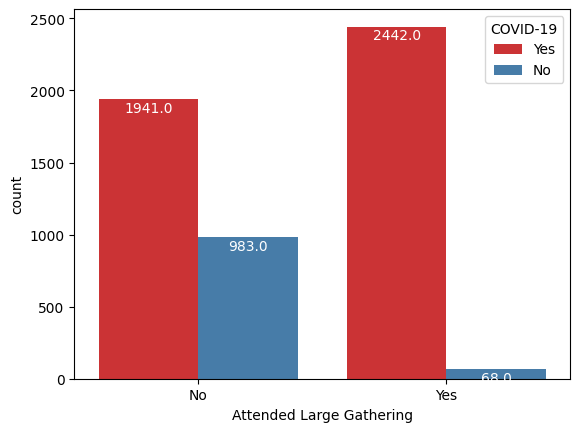

In [ ]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [ ]:
e=LabelEncoder() # Conversion from categorical data to numerical data

In [ ]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19,date
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,2022-01-01
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,2022-01-02
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,2022-01-03
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1,2022-01-04
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,2022-01-05


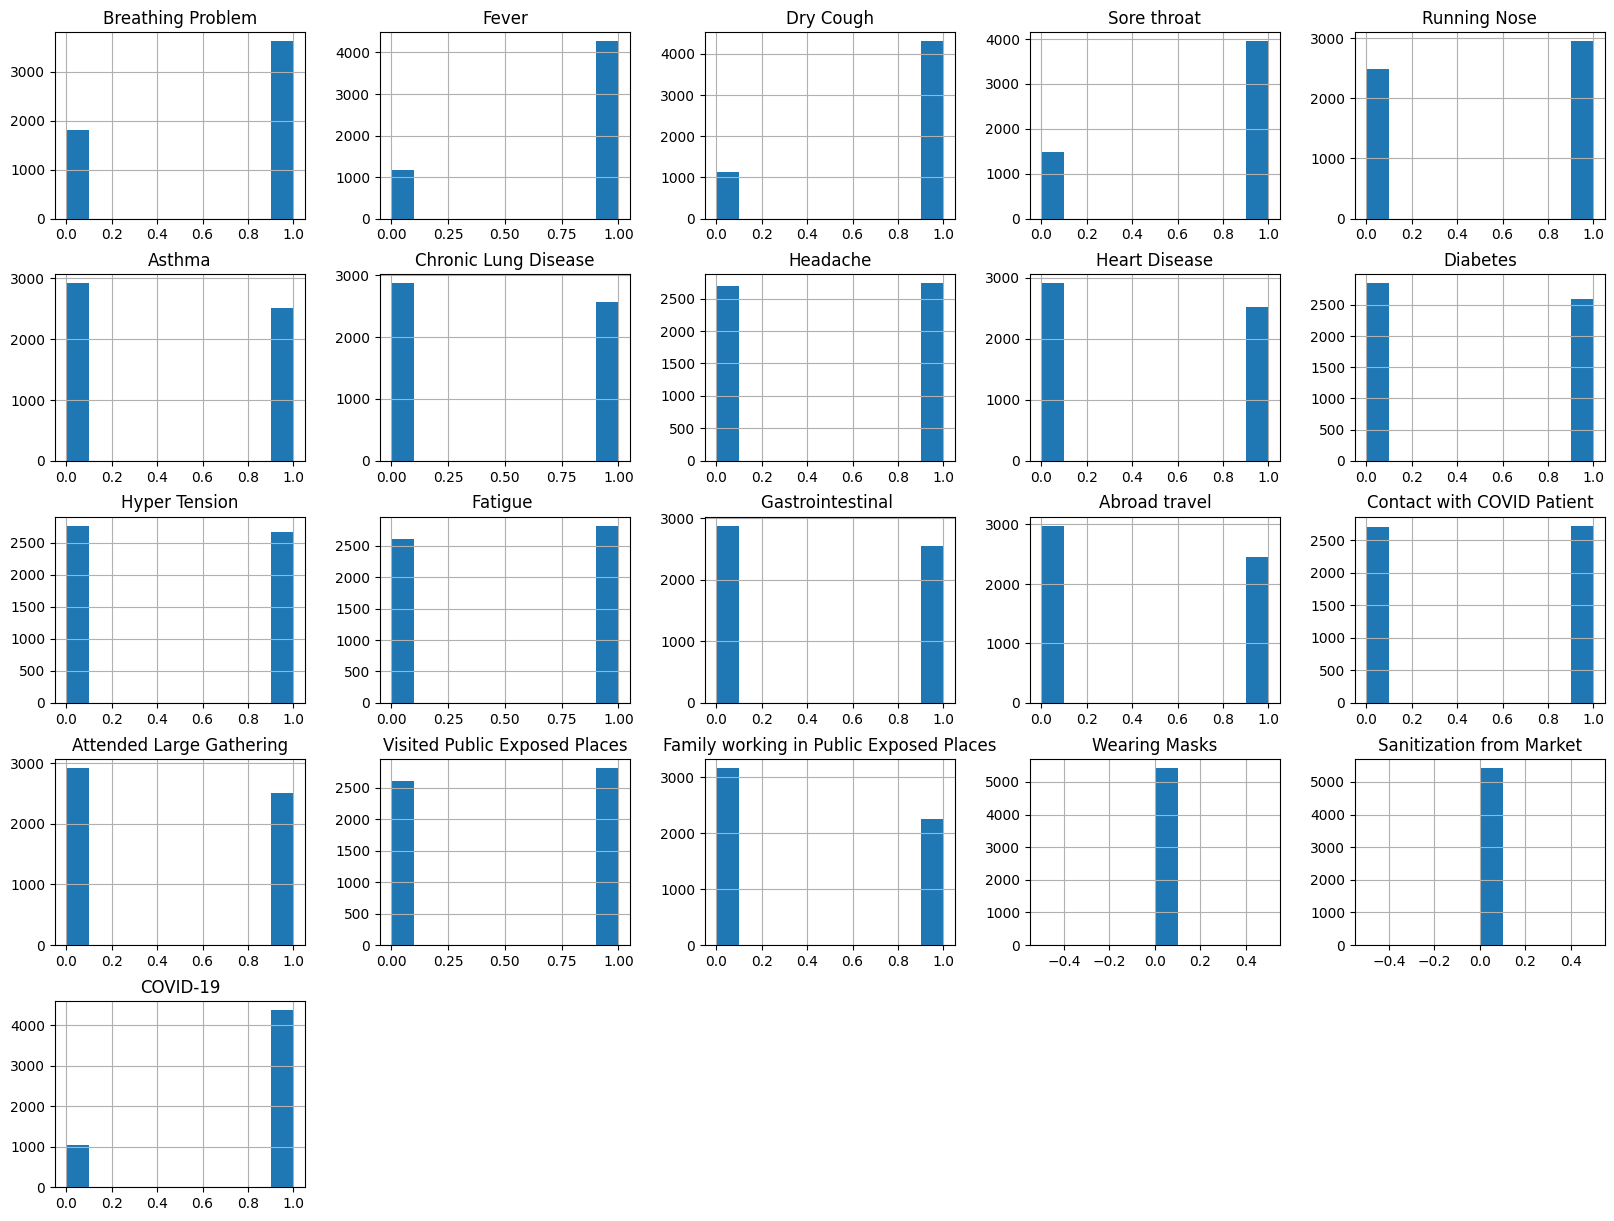

In [ ]:
covid_data.hist(figsize=(20,15));

Wearing Masks
0    5434
Name: count, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

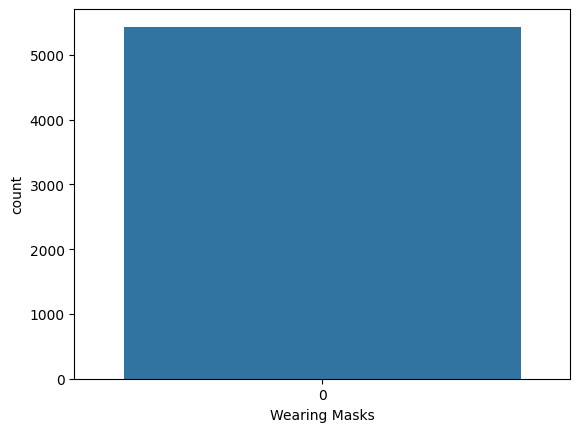

In [ ]:
print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)

Sanitization from Market
0    5434
Name: count, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

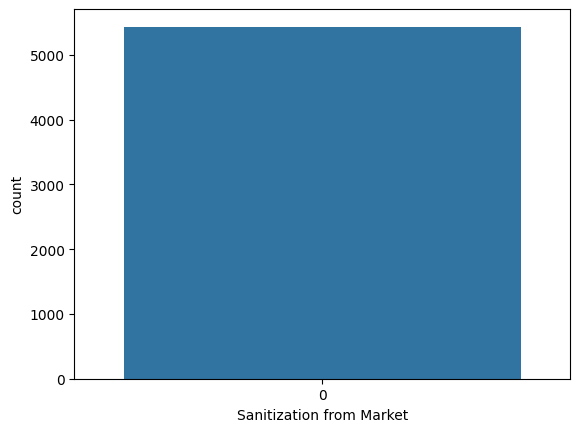

In [ ]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)

In [ ]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

In [ ]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19', 'date'],
      dtype='object')

<Axes: >

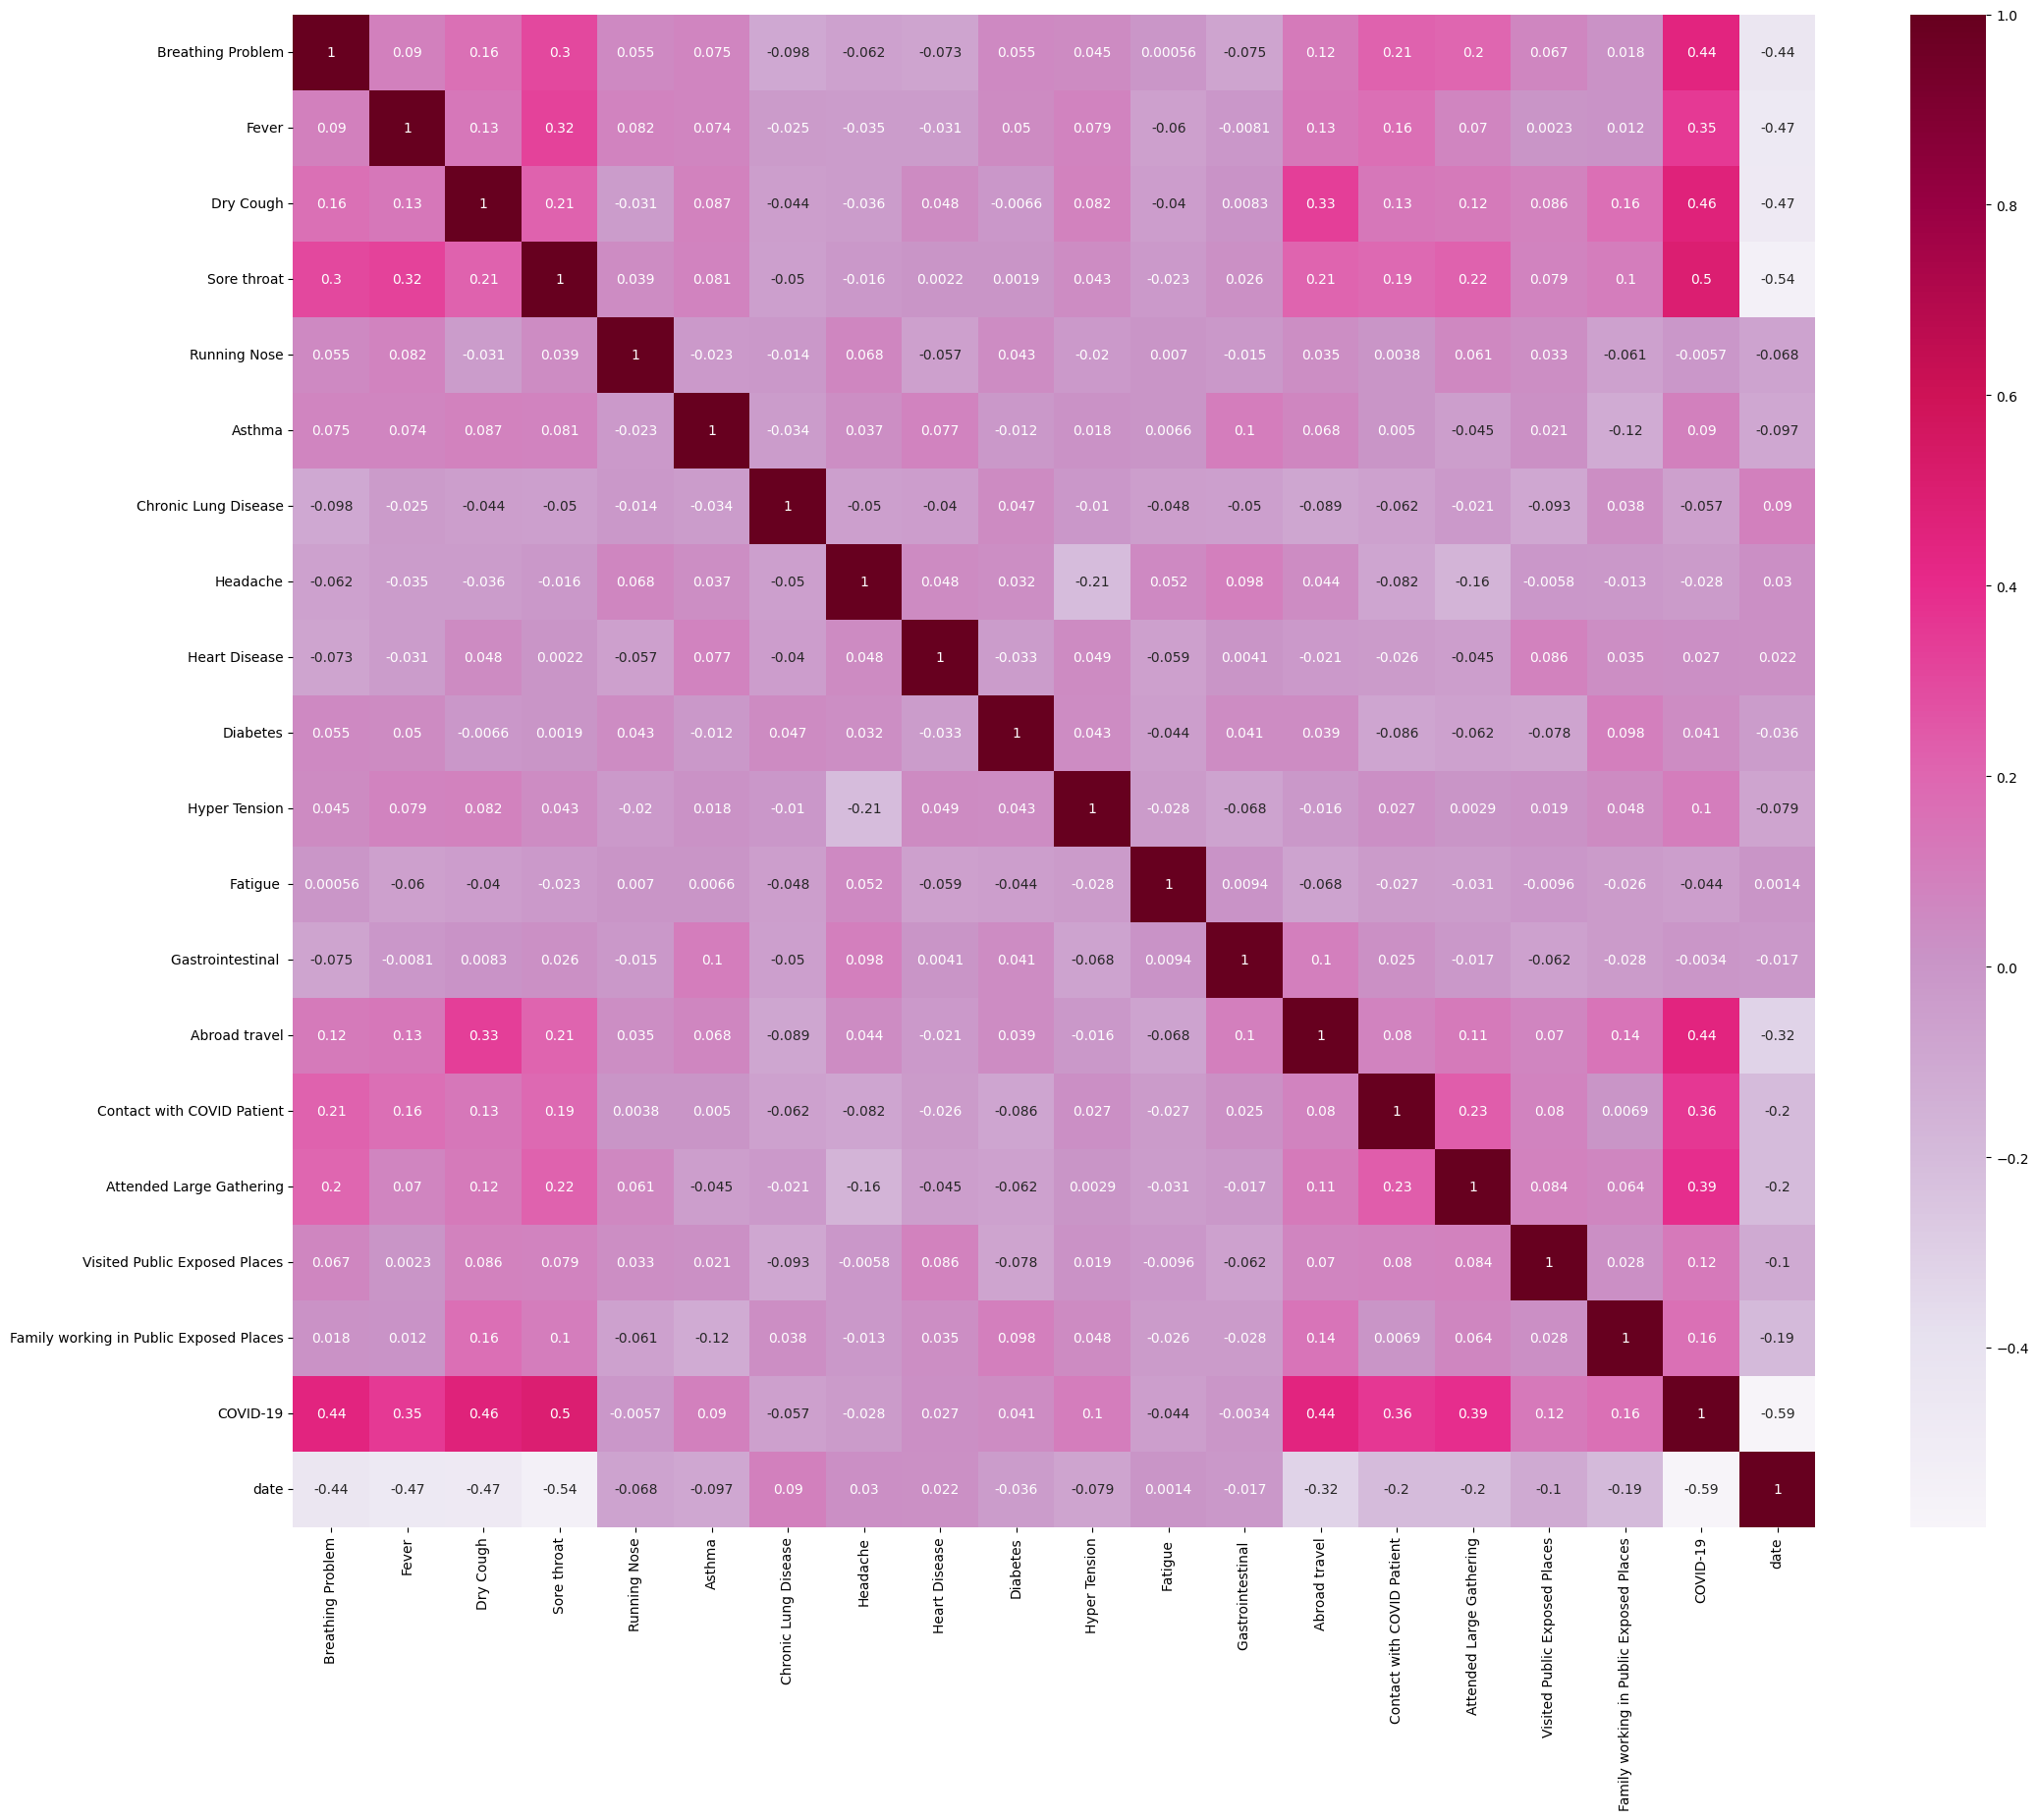

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [ ]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Int64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

In [ ]:
# Step 5: Predict cases and evaluate
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.014862641060717613


In [ ]:
df=pd.DataFrame({'Actual Cases': y_test, 'Predicted Cases': y_pred})
df

,Actual Cases,Predicted Cases
977,1,1.000000
2309,1,1.000000
356,1,1.000000
2478,1,1.000000
4963,0,0.000000
...,...,...
177,1,0.615102
1815,1,1.000000
4811,0,0.000000
4565,0,0.194342


In [ ]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [ ]:
# Step 2: Generate a Date Column
# Assuming the data starts from a specific date (e.g., '2022-01-01')
start_date = "2022-01-01"
covid_data['date'] = pd.date_range(start=start_date, periods=len(covid_data), freq='D')
future_dates = pd.date_range(start=covid_data['date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
print(future_dates)

DatetimeIndex(['2036-11-17', '2036-11-18', '2036-11-19', '2036-11-20',
               '2036-11-21', '2036-11-22', '2036-11-23', '2036-11-24',
               '2036-11-25', '2036-11-26', '2036-11-27', '2036-11-28',
               '2036-11-29', '2036-11-30', '2036-12-01', '2036-12-02',
               '2036-12-03', '2036-12-04', '2036-12-05', '2036-12-06',
               '2036-12-07', '2036-12-08', '2036-12-09', '2036-12-10',
               '2036-12-11', '2036-12-12', '2036-12-13', '2036-12-14',
               '2036-12-15', '2036-12-16'],
              dtype='datetime64[ns]', freq='D')


Mean Absolute Error: 261.5132751464844
Root Mean Square Error: 313.91630303713123


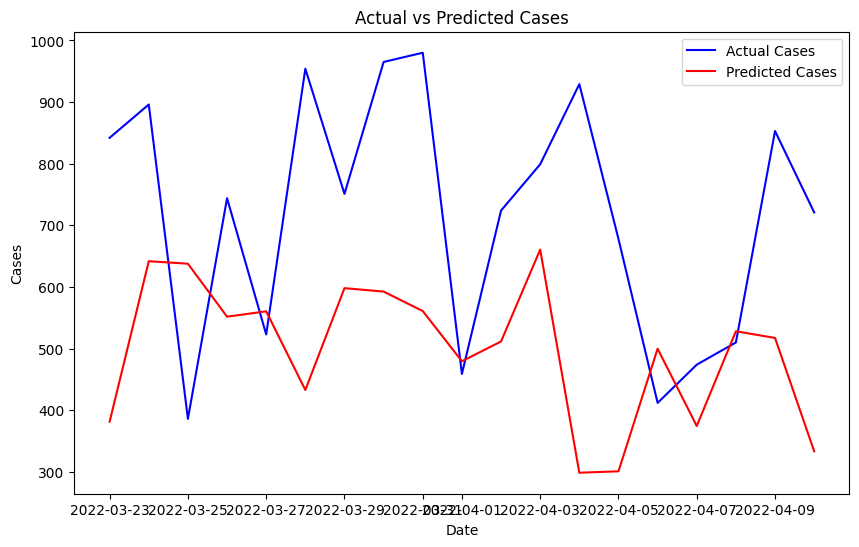

         date  predicted_cases
0  2022-04-11       495.825195
1  2022-04-12       514.879761
2  2022-04-13       526.878113
3  2022-04-14       517.443726
4  2022-04-15       502.926758
5  2022-04-16       489.945068
6  2022-04-17       489.945068
7  2022-04-18       381.695404
8  2022-04-19       359.993927
9  2022-04-20       369.895142
10 2022-04-21       339.262085
11 2022-04-22       388.932556
12 2022-04-23       382.521545
13 2022-04-24       550.351318
14 2022-04-25       585.950806
15 2022-04-26       571.338684
16 2022-04-27       571.832275
17 2022-04-28       501.265167
18 2022-04-29       485.567688
19 2022-04-30       479.671387
20 2022-05-01       362.184784
21 2022-05-02       497.219696
22 2022-05-03       425.975525
23 2022-05-04       447.276550
24 2022-05-05       431.030640
25 2022-05-06       422.191986
26 2022-05-07       410.231140
27 2022-05-08       462.514221
28 2022-05-09       495.825195
29 2022-05-10       499.547455


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

# Simulate dataset with 'cases' column
data_size = 100  # Example: 100 days of data
covid_data = pd.DataFrame({'cases': np.random.randint(100, 1000, data_size)})  # Random cases for demonstration

# Step 1: Generate a Date Column
start_date = "2022-01-01"
covid_data['date'] = pd.date_range(start=start_date, periods=len(covid_data), freq='D')

# Step 2: Feature Engineering
covid_data['year'] = covid_data['date'].dt.year
covid_data['month'] = covid_data['date'].dt.month
covid_data['day'] = covid_data['date'].dt.day
covid_data['day_of_week'] = covid_data['date'].dt.dayofweek
covid_data['week_of_year'] = covid_data['date'].dt.isocalendar().week

# Add lagging features
covid_data['lag_1'] = covid_data['cases'].shift(1)
covid_data['lag_7'] = covid_data['cases'].shift(7)

# Drop rows with NaN values introduced by lagging
covid_data = covid_data.dropna()

# Step 3: Define Features and Target
X = covid_data[['year', 'month', 'day', 'day_of_week', 'week_of_year', 'lag_1', 'lag_7']]
y = covid_data['cases']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Model Training
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 6: Predictions on Test Set
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

# Visualize Actual vs Predicted Cases
plt.figure(figsize=(10, 6))
plt.plot(covid_data['date'].iloc[len(X_train):], y_test, label='Actual Cases', color='blue')
plt.plot(covid_data['date'].iloc[len(X_train):], y_pred, label='Predicted Cases', color='red')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.title('Actual vs Predicted Cases')
plt.show()

# Step 7: Predict Future Cases
future_dates = pd.date_range(start=covid_data['date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['week_of_year'] = future_df['date'].dt.isocalendar().week

# Use the last known lag features for predictions
future_df['lag_1'] = covid_data['cases'].iloc[-1]
future_df['lag_7'] = covid_data['cases'].iloc[-7]

# Predict future cases
future_predictions = model.predict(future_df[['year', 'month', 'day', 'day_of_week', 'week_of_year', 'lag_1', 'lag_7']])
future_df['predicted_cases'] = future_predictions

print(future_df[['date', 'predicted_cases']])
